In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive 
from sklearn.preprocessing import StandardScaler

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_X = pd.read_csv("/content/drive/MyDrive/MSc-project-lof/df_X_iter5_v2_before smote_transformed_ready to train.csv")
df_y = pd.read_csv("/content/drive/MyDrive/MSc-project-lof/df_y_iter5_v2_before smote_transformed_ready to train.csv")
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4740 entries, 0 to 4739
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   col_0                                      4740 non-null   int64  
 1   col_1                                      4740 non-null   int64  
 2   col_2                                      4740 non-null   int64  
 3   col_3                                      4740 non-null   int64  
 4   col_4                                      4740 non-null   int64  
 5   col_5                                      4740 non-null   int64  
 6   col_6                                      4740 non-null   int64  
 7   col_7                                      4740 non-null   int64  
 8   Chromosome                                 4740 non-null   int64  
 9   VEP Annotation                             4740 non-null   int64  
 10  Allele Count            

In [ ]:
X = df_X.to_numpy(dtype='float64')
y = df_y.to_numpy().reshape(-1,)
X.shape, y.shape

((4740, 47), (4740,))

In [ ]:
# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=0.95)
pca.fit(X)
X_pca = pca.transform(X)

In [ ]:
X_pca.shape

(4740, 17)

In [ ]:
X_cols = list(df_X.columns)

In [ ]:
df_comp = pd.DataFrame(pca.components_,columns=X_cols)

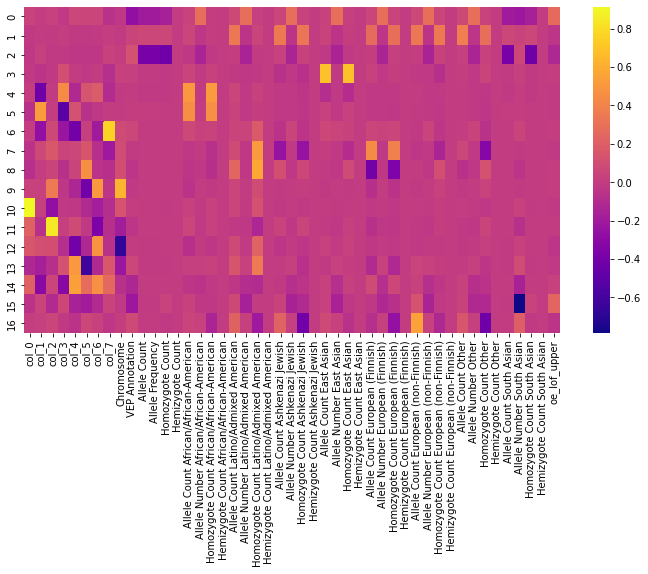

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [ ]:
np.savetxt("/content/drive/MyDrive/MSc-project-lof/df_X_test_iter5_v4_PCA_transformed_ready to train.csv",X_pca,delimiter=',')